# INTENT

The given dataset has the intention to create a predictive model that relates the chemical structures and properties of compounds to their toxicity towards fish. It aims to find the relationship between the molecular descriptors and properties with respect to the damage caused to the fish in order to find out aa solution to minimize it with help of the analysis of the dataset.

#Importing libraries required and opening the csv file and storing it in a dataframe created called df

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
df=pd.read_csv('qsar_fish_toxicity.csv')
df

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0.0,1,1.453,3.770
1,2.189,0.580,0.863,0.0,0,1.348,3.115
2,2.125,0.638,0.831,0.0,0,1.348,3.531
3,3.027,0.331,1.472,1.0,0,1.807,3.510
4,2.094,0.827,0.860,0.0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0.0,2,0.736,3.109
904,3.652,0.872,0.867,2.0,3,3.983,4.040
905,3.763,0.916,0.878,0.0,6,2.918,4.818
906,2.831,1.393,1.077,0.0,1,0.906,5.317


#Data cleaning process starts.
#1.Missing value imputation

#As provided in the word file, the rows with value 0 of the column named 'SM1_Dz(Z)' are replaced by null value for better results

In [2]:
df['SM1_Dz(Z)']=df['SM1_Dz(Z)'].replace(0,float('NaN'))
print(df.isna().sum())

CIC0                   2
SM1_Dz(Z)             38
GATS1i                 2
NdsCH                  1
NdssC                  0
MLOGP                  3
LC50 [-LOG(mol/L)]     2
dtype: int64


#The percentage of null values of each column as well as their skewness is calculated. The missing values are then imputed with median values as the dataset contains discrete and continuous variables.

In [3]:
df.isna().sum()/len(df)*100

CIC0                  0.220264
SM1_Dz(Z)             4.185022
GATS1i                0.220264
NdsCH                 0.110132
NdssC                 0.000000
MLOGP                 0.330396
LC50 [-LOG(mol/L)]    0.220264
dtype: float64

In [4]:
df.skew()

CIC0                  0.045111
SM1_Dz(Z)             0.736832
GATS1i                1.391213
NdsCH                 3.398560
NdssC                 7.489497
MLOGP                -0.038095
LC50 [-LOG(mol/L)]    0.254314
dtype: float64

In [5]:
for i in df.columns :
        df[i].fillna(df[i].median(),inplace=True)
print(df.isna().sum())

CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64


#2. Outliers are detected by using z score and IQR method and selecting the best i.e z score

In [6]:
outliers1=pd.DataFrame()
df1=pd.DataFrame()
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers1 = (df[col] < LB) | (df[col] > UB)
    df1=df[~outliers1]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CIC0                884 non-null    float64
 1   SM1_Dz(Z)           884 non-null    float64
 2   GATS1i              884 non-null    float64
 3   NdsCH               884 non-null    float64
 4   NdssC               884 non-null    int64  
 5   MLOGP               884 non-null    float64
 6   LC50 [-LOG(mol/L)]  884 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 55.2 KB


In [7]:
import copy
outliers2=pd.DataFrame()
df2=pd.DataFrame()
z_scores = np.abs((df - df.mean()) / df.std())
outliers2= (z_scores > 3)|(z_scores < -3)
df2=df[~outliers2]
df2.info()
df=copy.copy(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CIC0                907 non-null    float64
 1   SM1_Dz(Z)           905 non-null    float64
 2   GATS1i              900 non-null    float64
 3   NdsCH               896 non-null    float64
 4   NdssC               895 non-null    float64
 5   MLOGP               905 non-null    float64
 6   LC50 [-LOG(mol/L)]  901 non-null    float64
dtypes: float64(7)
memory usage: 49.8 KB


#Imputing outlier values with knn imputation for better result

In [8]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=6)
imputed_df =pd.DataFrame(knn_imputer.fit_transform(df),columns=df.columns)
df=copy.copy(imputed_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CIC0                908 non-null    float64
 1   SM1_Dz(Z)           908 non-null    float64
 2   GATS1i              908 non-null    float64
 3   NdsCH               908 non-null    float64
 4   NdssC               908 non-null    float64
 5   MLOGP               908 non-null    float64
 6   LC50 [-LOG(mol/L)]  908 non-null    float64
dtypes: float64(7)
memory usage: 49.8 KB


#Before continuing with the dataset, #3. Data scaling is performed as a data normalization technique for cleaner and more uniform data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df=copy.copy(scaled_df)
df

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,0.486059,0.450840,1.035850,-0.405471,0.753956,-0.469085,-0.193095
1,-0.944591,-0.169697,-1.121269,-0.405471,-0.599885,-0.542982,-0.659657
2,-1.030082,-0.025154,-1.206174,-0.405471,-0.599885,-0.542982,-0.363337
3,0.174816,-0.790234,0.494580,1.753872,-0.599885,-0.219948,-0.378295
4,-1.071492,0.445856,-1.129229,-0.405471,-0.599885,-0.164350,0.960844
...,...,...,...,...,...,...,...
903,-0.127076,0.199136,2.495155,-0.405471,2.107798,-0.973694,-0.663931
904,1.009696,0.558001,-1.110656,3.913215,3.461639,1.311472,-0.000772
905,1.157971,0.667654,-1.081470,-0.405471,0.077036,0.561949,0.553404
906,-0.087002,1.856394,-0.553467,-0.405471,0.753956,-0.854051,0.908845


#Finding its descriptive values and visualizing the dataset for proper observation

In [10]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
count,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02
mean,3.364905e-16,-5.869020e-17,4.695216e-16,4.695216e-17,-6.064654e-17,-5.086484e-17,-3.492067e-16
std,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00
min,-2.977690e+00,-1.281181e+00,-2.360352e+00,-4.054714e-01,-5.998850e-01,-2.961865e+00,-2.840743e+00
25%,-7.291917e-01,-9.896037e-01,-8.884436e-01,-4.054714e-01,-5.998850e-01,-6.408069e-01,-6.334794e-01
50%,5.058612e-02,-1.696972e-01,-1.242981e-01,-4.054714e-01,-5.998850e-01,5.260762e-03,-4.066117e-02
75%,6.824232e-01,6.053511e-01,7.293957e-01,-4.054714e-01,7.539565e-01,6.942588e-01,6.080732e-01
max,3.021423e+00,3.020212e+00,3.105411e+00,3.913215e+00,3.461639e+00,3.093436e+00,2.967415e+00


#From the visualization techniques heatmap and pairplot we can observe the correlation and decide what features to select as the X subset for training and testing for optimal observations. As we can see that the features 'MLOGP' and 'SM1_Dz(Z)' are highly correlated to the target variable 'LC50 [-LOG(mol/L)]'

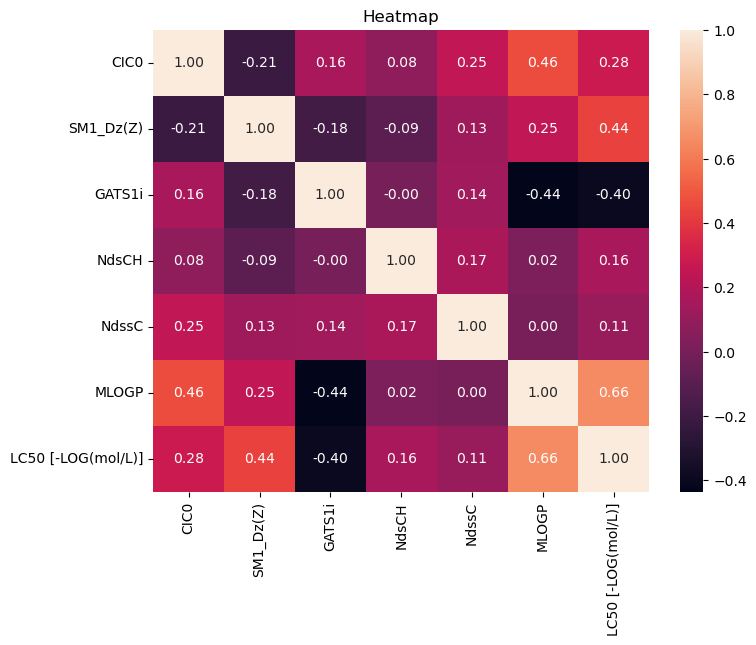

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f')
plt.title("Heatmap")
plt.show()

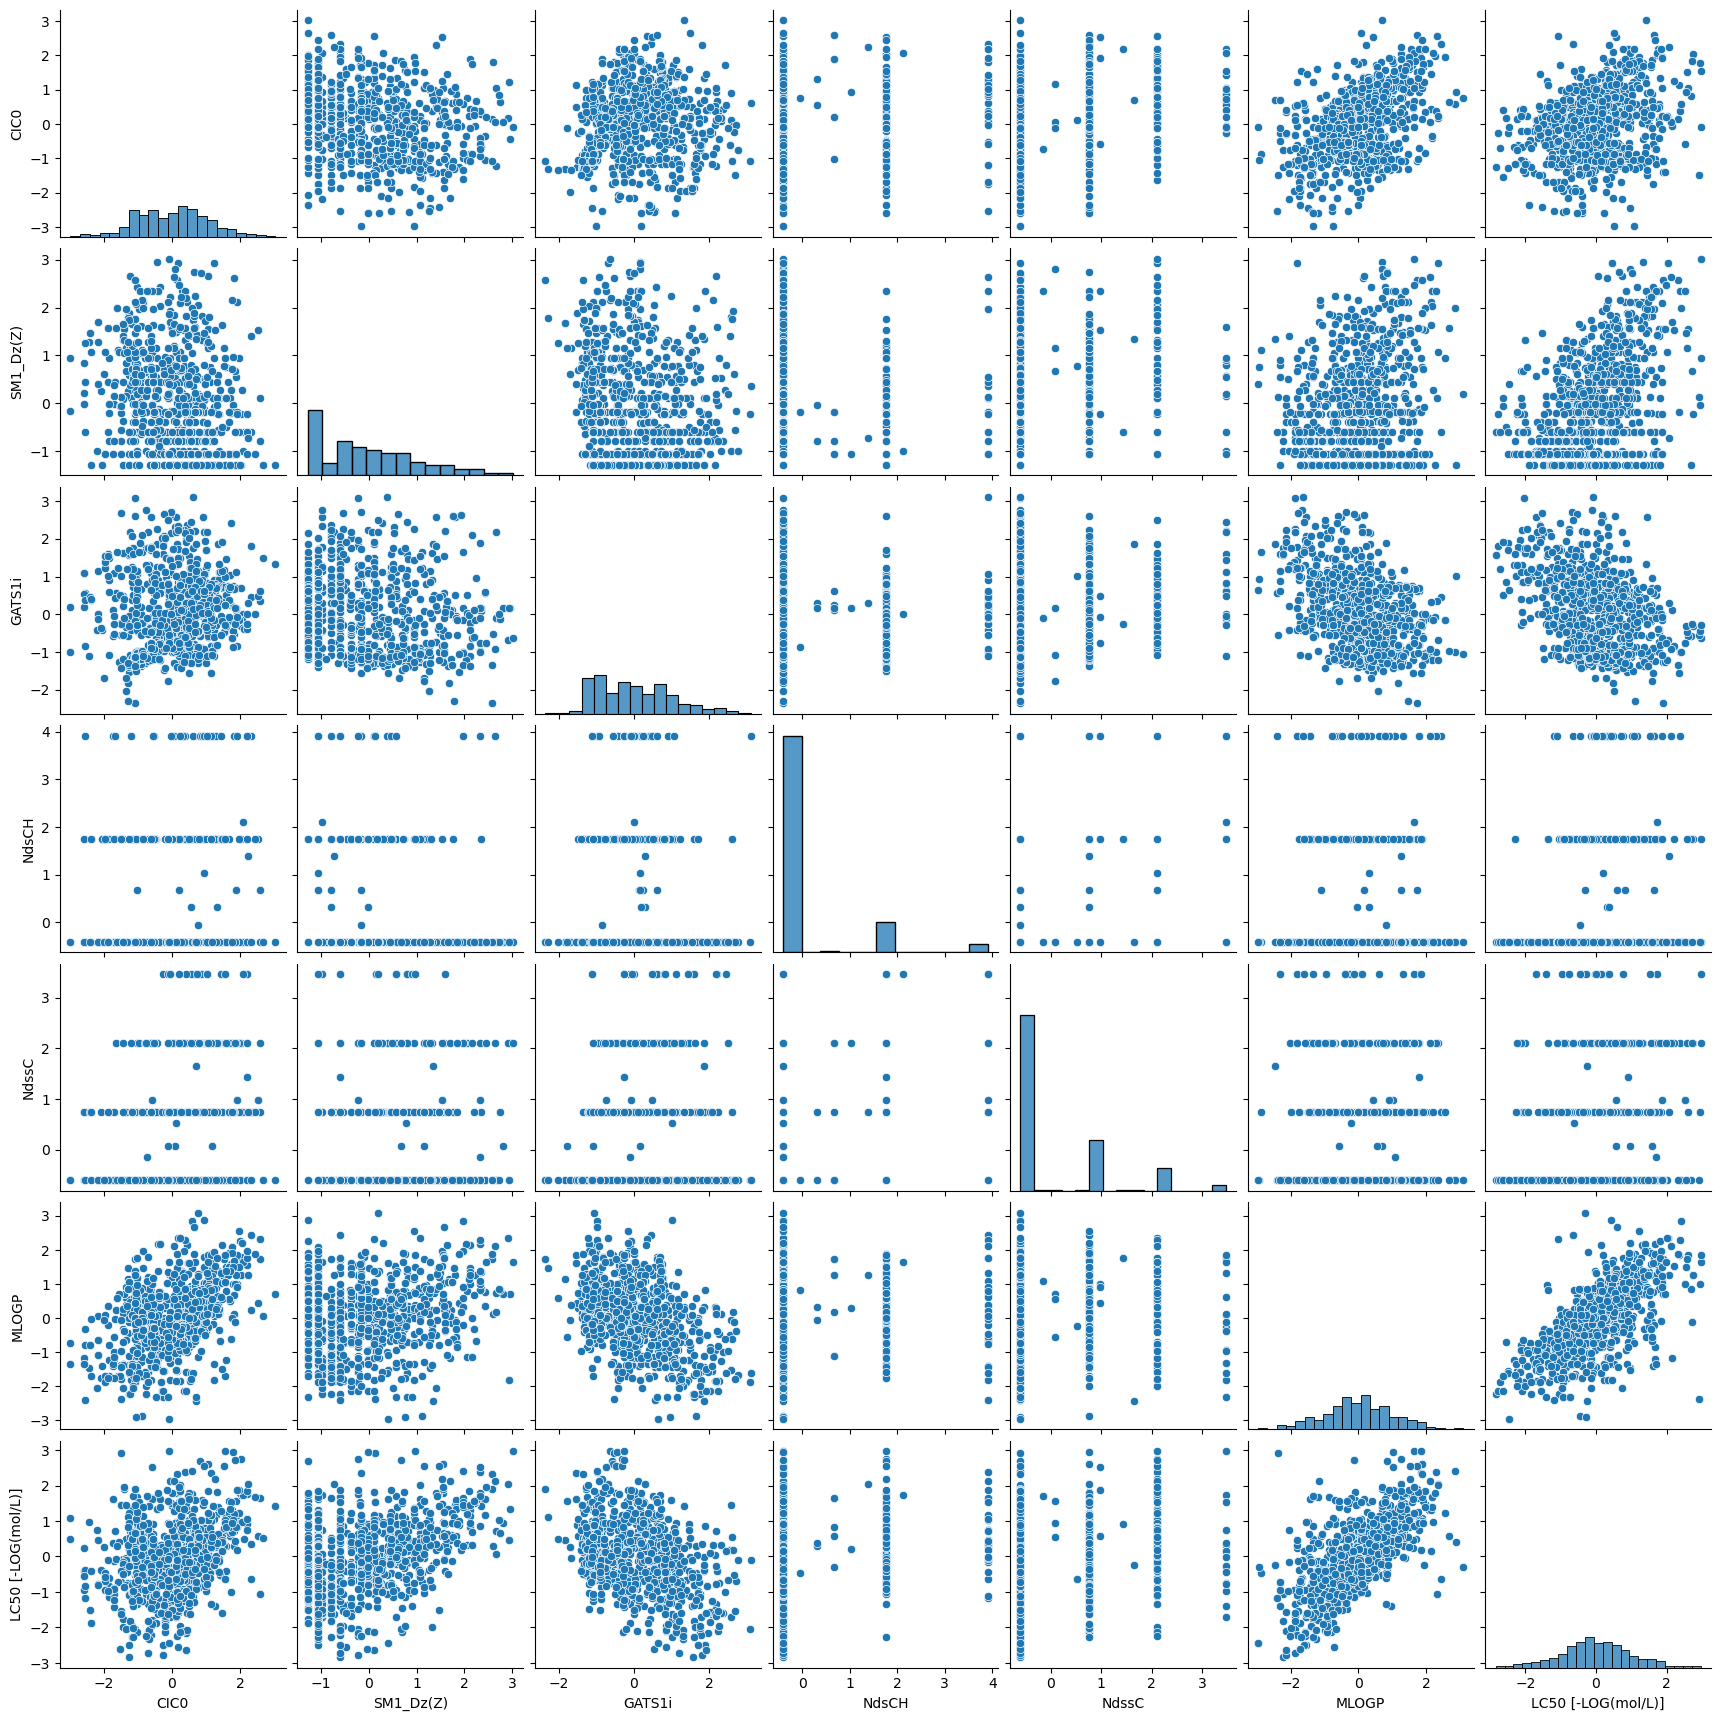

In [12]:
sns.pairplot(df) 

#Now a boxplot helped us observe how different are the values of the outliers from other values. And as we can observe NdssC is heavily skewed. NdsCH contains more outliers than other features

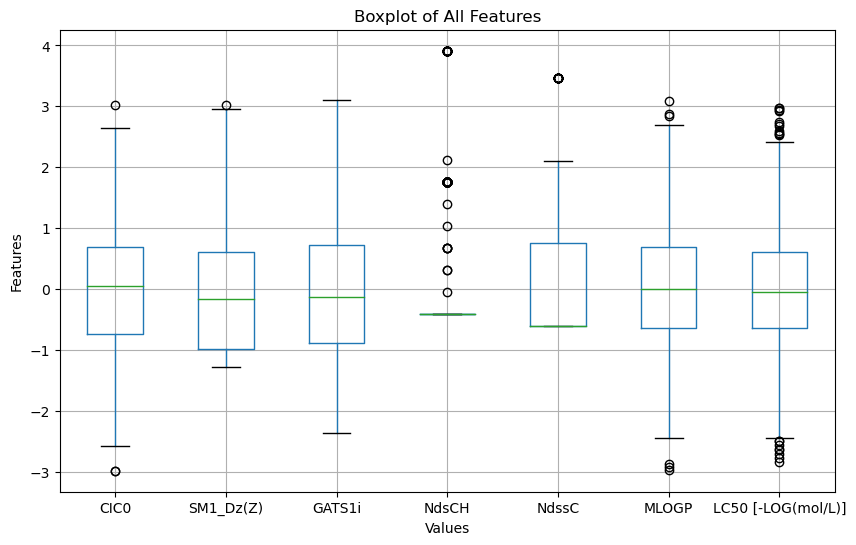

In [13]:
column_names=df.columns
plt.figure(figsize=(10, 6))
df.boxplot(vert=True)
plt.title('Boxplot of All Features')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

<Axes: ylabel='Count'>

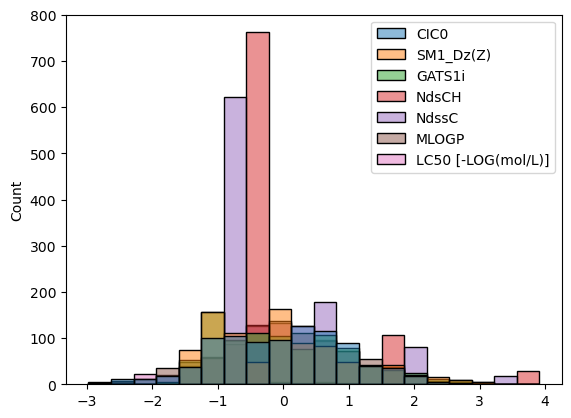

In [14]:
sns.histplot(df,bins=20)

#We imported splitting function and the evaluation parameters for the regression models. Then we performed the PCA feature selection algorith to observe every columns variance with respect to the target variable. As we can see it keeps on decreasing as we iterate through the columns

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP','LC50 [-LOG(mol/L)]']]
y = df['LC50 [-LOG(mol/L)]'] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 7
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
if 'LC50' in df.columns:
    pca_df['LC50'] = y
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.32894498 0.21229338 0.15844905 0.13918452 0.09004994 0.04101184
 0.03006628]


#We performed hyperparameter tuning on various regression models by selecting 'MLOGP','SM1_Dz(Z)','CIC0','GATS1i' features 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
X = df[['MLOGP','SM1_Dz(Z)','CIC0','GATS1i']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
lr = LinearRegression()
param_grid = {}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Mean_squared_error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Mean_squared_error: 0.674935244039004
Best Hyperparameters: {}
R2_score: 0.6165019391528606


In [18]:
from sklearn.linear_model import Ridge
X = df[['MLOGP','SM1_Dz(Z)','CIC0','GATS1i']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
ridge = Ridge()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0,100.0]  
}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )


Root Mean Squared Error: 0.6762752587920519
Best Hyperparameters: {'alpha': 10.0}
R2_score: 0.6149776352886194


In [19]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
X = df[['MLOGP','SM1_Dz(Z)','CIC0','GATS1i']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
lasso = Lasso()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_lasso = grid_search.best_estimator_
y_pred = best_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )


Root Mean Squared Error: 0.6752852758378668
Best Hyperparameters: {'alpha': 0.001}
R2_score: 0.616104060020468


In [20]:
from sklearn.ensemble import RandomForestRegressor
X = df[['MLOGP','SM1_Dz(Z)','CIC0','GATS1i']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],         
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],          
    'max_features': ['auto', 'sqrt'],       
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6476818967112646
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
R2_score: 0.6468473454249251


In [21]:
from sklearn.tree import DecisionTreeRegressor
X = df[['MLOGP','SM1_Dz(Z)','CIC0','GATS1i']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
dt = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 5, 10, 15],            
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'max_features': ['auto', 'sqrt'],          
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.7595358429402768
Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Negative Mean Squared Error: -0.46468514548715445
R2_score: 0.5143364555544647


In [22]:
from sklearn.ensemble import AdaBoostRegressor
X = df[['MLOGP','SM1_Dz(Z)','CIC0','GATS1i']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
estimator = DecisionTreeRegressor(max_depth=4)
adaboost = AdaBoostRegressor(estimator=estimator)
param_grid = {
    'n_estimators': [50, 100, 200],          
    'learning_rate': [0.01, 0.1, 0.5, 1.0]   
}
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_adaboost = grid_search.best_estimator_
y_pred = best_adaboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6935374762215725
Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best Negative Mean Squared Error: -0.4404252734622589
R2_score: 0.5950710513025794


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
X = df[['MLOGP','SM1_Dz(Z)','GATS1i','CIC0']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],          
    'learning_rate': [0.01, 0.1, 0.5],       
    'max_depth': [3, 5, 7],                  
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
}
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.7103641497764226
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Negative Mean Squared Error: -0.39405846830217195
R2_score: 0.5585093994568007


In [24]:
from sklearn.ensemble import BaggingRegressor
X = df[['MLOGP','SM1_Dz(Z)','GATS1i','CIC0']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
estimator = DecisionTreeRegressor()
bagging = BaggingRegressor(estimator=estimator)
param_grid = {
    'n_estimators': [50, 100, 200],          
    'max_samples': [0.5, 0.7, 0.9],          
}
grid_search = GridSearchCV(bagging, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_bagging = grid_search.best_estimator_
y_pred = best_bagging.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6621949051624335
Best Hyperparameters: {'max_samples': 0.5, 'n_estimators': 50}
Best Negative Mean Squared Error: -0.40820700840084073
R2_score: 0.6308434075280358


In [25]:
from sklearn.svm import SVR
X = df[['MLOGP','SM1_Dz(Z)','GATS1i','CIC0']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
svr = SVR()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],       
    'C': [0.1, 1.0, 10.0],                    
    'gamma': ['scale', 'auto', 0.1, 0.01],     
    'degree': [2, 3, 4]                        
}
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6612272757401016
Best Hyperparameters: {'C': 1.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best Negative Mean Squared Error: -0.3980376610421625
R2_score: 0.6319214762178267


In [26]:
from sklearn.neighbors import KNeighborsRegressor
X = df[['MLOGP','SM1_Dz(Z)','GATS1i','CIC0']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]                          
}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6545306089739754
Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
R2_score: 0.6393392507439352


In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
X = df[['MLOGP','SM1_Dz(Z)','GATS1i','CIC0']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1e3))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gpr.fit(X_train, y_train)
y_pred, sigma = gpr.predict(X_test, return_std=True)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.7518406272922206
R2_score: 0.5054491295532803


#We got the highest R2_score for kneighbors regression model.It suggests that knn model fits the data the best compared to other models and that the KNN model captures a substantial portion of the variance in the target variable and its predictions align well with the actual target values.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
lr = LinearRegression()
param_grid = {}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Mean_squared_error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Mean_squared_error: 0.7082508302734639
Best Hyperparameters: {}
R2_score: 0.5777077189975297


In [29]:
from sklearn.linear_model import Ridge
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
ridge = Ridge()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0,100.0,1000.00]  
}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )


Root Mean Squared Error: 0.708265941450217
Best Hyperparameters: {'alpha': 0.1}
R2_score: 0.5776896988241598


In [30]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
lasso = Lasso()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_lasso = grid_search.best_estimator_
y_pred = best_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.7084771578320812
Best Hyperparameters: {'alpha': 0.001}
R2_score: 0.5774377817153757


In [31]:
from sklearn.ensemble import RandomForestRegressor
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],         
    'max_depth': [30,40,50],       
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],          
    'max_features': ['auto', 'sqrt'],       
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6952551390325271
Best Hyperparameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
R2_score: 0.5930628175136974


In [32]:
from sklearn.tree import DecisionTreeRegressor
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
dt = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 5, 10, 15],            
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'max_features': ['auto', 'sqrt'],          
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.7119160539415612
Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Negative Mean Squared Error: -0.5223415610646488
R2_score: 0.5733256539264288


C:\Users\praty\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [33]:
from sklearn.ensemble import AdaBoostRegressor
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
estimator = DecisionTreeRegressor(max_depth=4)
adaboost = AdaBoostRegressor(estimator=estimator)
param_grid = {
    'n_estimators': [50, 100, 200],          
    'learning_rate': [0.01, 0.1, 0.5, 1.0]   
}
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_adaboost = grid_search.best_estimator_
y_pred = best_adaboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.7319386212189697
Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best Negative Mean Squared Error: -0.4723016722535909
R2_score: 0.5489878042956244


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],          
    'learning_rate': [0.01, 0.1, 0.5],       
    'max_depth': [3, 5, 7],                  
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
}
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.7735232459169167
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Negative Mean Squared Error: -0.4278909074944601
R2_score: 0.47651272430953673


In [35]:
from sklearn.svm import SVR
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
svr = SVR()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],       
    'C': [0.1, 1.0, 10.0],                    
    'gamma': ['scale', 'auto', 0.1, 0.01],     
    'degree': [2, 3, 4]                        
}
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6968505757988424
Best Hyperparameters: {'C': 1.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best Negative Mean Squared Error: -0.45771717836920967
R2_score: 0.5911930363910354


In [36]:
from sklearn.neighbors import KNeighborsRegressor
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]                          
}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.7049711100609969
Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Negative Mean Squared Error: -0.4990085819081303
R2_score: 0.5816097087643014


In [37]:
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import filterwarnings
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1e1))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
filterwarnings("ignore")
gpr.fit(X_train, y_train)
y_pred = gpr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.8321779385226322
R2_score: 0.4169962409797042


In [38]:
from sklearn.ensemble import BaggingRegressor
X = df[['MLOGP','SM1_Dz(Z)']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
estimator = DecisionTreeRegressor()
bagging = BaggingRegressor(estimator=estimator)
param_grid = {
    'n_estimators': [50, 100, 200],          
    'max_samples': [0.5, 0.7, 0.9],          
}
grid_search = GridSearchCV(bagging, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_bagging = grid_search.best_estimator_
y_pred = best_bagging.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6970443155038588
Best Hyperparameters: {'max_samples': 0.5, 'n_estimators': 100}
Best Negative Mean Squared Error: -0.48235835300586444
R2_score: 0.5909656902331841


#After considering a subset of 'MLOGP','SM1_Dz(Z)' as the features, we got the highest r2_score as 59 for randomforest regression model. It suggests that for the given set of features this model fits the best compared to the others. This also suggests that the features have a strong relationship with the target variable and give good predictive performance and analysis wwhen its done using random forest regression model. 

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
lr = LinearRegression()
param_grid = {}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Mean_squared_error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Mean_squared_error: 0.6649849935347423
Best Hyperparameters: {}
R2_score: 0.6277260492904968


In [40]:
from sklearn.linear_model import Ridge
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
ridge = Ridge()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0,100.0,1000.00]  
}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6662346913685838
Best Hyperparameters: {'alpha': 10.0}
R2_score: 0.626325515129016


In [41]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
lasso = Lasso()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_lasso = grid_search.best_estimator_
y_pred = best_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r1 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6652408339802838
Best Hyperparameters: {'alpha': 0.001}
R2_score: 0.626325515129016


In [42]:
from sklearn.ensemble import RandomForestRegressor
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],         
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],          
    'max_features': ['auto', 'sqrt'],       
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6296898646202965
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
R2_score: 0.6661953635955162


In [43]:
from sklearn.tree import DecisionTreeRegressor
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
dt = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 5, 10, 15],            
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'max_features': ['auto', 'sqrt'],          
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.7207428863899974
Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Negative Mean Squared Error: -0.4816845347382685
R2_score: 0.5626796491756737


In [44]:
from sklearn.ensemble import AdaBoostRegressor
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
estimator = DecisionTreeRegressor(max_depth=4)
adaboost = AdaBoostRegressor(estimator=estimator)
param_grid = {
    'n_estimators': [50, 100, 200],          
    'learning_rate': [0.01, 0.1, 0.5, 1.0]   
}
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_adaboost = grid_search.best_estimator_
y_pred = best_adaboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6811451618920024
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best Negative Mean Squared Error: -0.4207217869722816
R2_score: 0.6094125265237463


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],          
    'learning_rate': [0.01, 0.1, 0.5],       
    'max_depth': [3, 5, 7],                  
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
}
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.7033111752608194
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Negative Mean Squared Error: -0.38279120870135896
R2_score: 0.5672327109948496


In [46]:
from sklearn.svm import SVR
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
svr = SVR()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],       
    'C': [0.1, 1.0, 10.0],                    
    'gamma': ['scale', 'auto', 0.1, 0.01],     
    'degree': [2, 3, 4]                        
}
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6346547738844254
Best Hyperparameters: {'C': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Negative Mean Squared Error: -0.3585107434996479
R2_score: 0.6609107194817649


In [47]:
from sklearn.neighbors import KNeighborsRegressor
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]                          
}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6591498862375761
Best Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best Negative Mean Squared Error: -0.3742433482598098
R2_score: 0.6342306408394451


In [48]:
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import filterwarnings
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1e1))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
filterwarnings("ignore")
gpr.fit(X_train, y_train)
y_pred = gpr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6623267594241075
R2_score: 0.630696382186826


In [49]:
from sklearn.ensemble import BaggingRegressor
X = df[['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)
estimator= DecisionTreeRegressor()
bagging = BaggingRegressor(estimator=estimator)
param_grid = {
    'n_estimators': [50, 100, 200],          
    'max_samples': [0.5, 0.7, 0.9],          
}
grid_search= GridSearchCV(bagging, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_bagging = grid_search.best_estimator_
y_pred = best_bagging.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
print("Root Mean Squared Error:", rmse)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)
r2 = r2_score(y_test, y_pred)
print("R2_score:",r2 )

Root Mean Squared Error: 0.6274278515968473
Best Hyperparameters: {'max_samples': 0.5, 'n_estimators': 200}
Best Negative Mean Squared Error: -0.38063221354758614
R2_score: 0.6685892856531447


#From the above set of subset of features 'CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP' where we have considered all the features excluding the target variable, we can observe that Bagging regression model fits the best with the data giving a r2_score of approximately 67%.


#From all our observations above it is hence concluded that the model with the highest R2_score of '66%' is Bagging regression model which takes into consideration a subset of all the features excluding the target variable.
A low R2_score might mean that the model is underfitted and similarly high R2_score might mean that the model is overfitted.
But a point to be noted is that a low or a high r2_score does not necessarily imply whether the model is a perfect fit for the given dataset ,whether it gives a good predictive performance or whether the features have a strong relationship with the target variable.
The goodness of a R2_score usually depends on the complexity of the dataset.If the dataset is very complex then even a R2_score of 50% for a model would be good enough as a fit for further observations and solving the problem with a proper conclusion.